## Category Analysis for Chips Sales for Different Customer Segments and Lifestages

#### 1. Statement of Problem

To analyze chips sales and customer engagement in the featured customer segments. 

In [3]:
#load required libraries

import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;
import seaborn as sns;
import re
from collections import Counter
from scipy.stats import iqr;
import scipy.stats as stats
from datetime import datetime

#### 2. load transaction data dataset

In [6]:
transaction_data = pd.read_excel(r'/home/jeromemugita/Downloads/QVI_transaction_data.xlsx', sheet_name = 'in')

In [7]:
transaction_data_copy = transaction_data

#### 3. Explanatory Data Analysis for transaction Data

In [8]:
transaction_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [9]:
transaction_data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [10]:
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME']

In [11]:
transaction_data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [12]:
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D').dt.strftime('%Y-%m-%d')

In [13]:
transaction_data.dtypes

DATE               object
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [14]:
transaction_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [15]:
transaction_data.shape

(264836, 8)

In [16]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [17]:
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [18]:
transaction_data.isnull()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
264831,False,False,False,False,False,False,False,False
264832,False,False,False,False,False,False,False,False
264833,False,False,False,False,False,False,False,False
264834,False,False,False,False,False,False,False,False


In [19]:
#computing the sum of missing values per column
transaction_data.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [20]:
transaction_data.isna()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
264831,False,False,False,False,False,False,False,False
264832,False,False,False,False,False,False,False,False
264833,False,False,False,False,False,False,False,False
264834,False,False,False,False,False,False,False,False


In [21]:
transaction_data.isna().any()

DATE              False
STORE_NBR         False
LYLTY_CARD_NBR    False
TXN_ID            False
PROD_NBR          False
PROD_NAME         False
PROD_QTY          False
TOT_SALES         False
dtype: bool

In [22]:
transaction_data.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [23]:
#sorting the transaction data

transaction_data.sort_values('TOT_SALES', ascending=False).head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
171815,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
184969,2019-05-20,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
150683,2019-05-20,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
117850,2019-05-19,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
5179,2018-08-15,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
17110,2018-08-16,172,172239,174254,7,Smiths Crinkle Original 330g,5,28.5


In [24]:
#filtering to remove non chip products

chips_reference = ["chp", "chps", "chip", "chips", "crisps", "potato", "corn"]
transaction_data['non_chips'] = ~transaction_data['PROD_NAME'].str.contains('|'.join(chips_reference), case=False, regex=True)

non_chips_products = transaction_data[transaction_data['non_chips']]

transaction_data_chips = pd.DataFrame(transaction_data[transaction_data['non_chips'] == False])

transaction_data_chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,False
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,False
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,False
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,False
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,False
...,...,...,...,...,...,...,...,...,...
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,False
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,False
264827,2018-08-28,272,272197,269911,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,False
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,False


In [25]:
transaction_data_chips.shape

(103184, 9)

In [26]:
#filtering to find unique words in the dataframe

transaction_data_chips['clean_words'] = transaction_data_chips['PROD_NAME'].str.lower().str.findall(r'\b\w+\b')
transaction_data_chips['clean_words'] = transaction_data_chips['clean_words'].apply(lambda words: [re.sub(r'[^a-zA-Z\s]', '', word) for word in words])

list_of_words = [word for words in transaction_data_chips['clean_words'] for word in words]
word_frequency = Counter(list_of_words)
sorted_words = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

for word, count in sorted_words:
    print(word, count)


g 97335
chips 49770
corn 22063
chip 18645
smiths 16872
doritos 15874
thins 14075
crisps 12607
salt 12584
original 12335
cobs 9693
popd 9693
kettle 9580
tortilla 9580
crinkle 9112
supreme 7911
cheese 7886
cut 7529
ww 7443
tyrrells 6442
chives 6427
vinegar 6300
sea 6284
cream 6225
natural 6050
chicken 4656
potato 4647
sour 4642
thinly 4527
chpshny 3296
jlpno 3296
chili 3296
swt 3269
chlli 3269
sr 3269
ched 3268
infuzions 3242
thai 3242
sweetchili 3242
potatomix 3242
crnkle 3233
orgnl 3233
big 3233
bag 3233
hot 3229
spicy 3229
mexican 3204
jalapeno 3204
light 3188
tangy 3188
dorito 3185
chp 3185
lightly 3174
salted 3174
southern 3172
nacho 3160
crm 3159
pringles 3157
chpsbtroot 3146
ricotta 3146
tostitos 3145
smoked 3145
chipotle 3145
chpsfeta 3138
garlic 3138
seasonedchicken 3114
chipco 3010
snbts 1576
whlgrn 1576
cheddr 1576
mstrd 1576
co 1572
tmato 1572
hrb 1572
spce 1572
vinegr 1550
barbecue 1489
stacked 1487
onionstacked 1483
chs 1481
oniong 1481
s 1473
onion 1473
d 1469
style 1469
c

In [27]:
transaction_data_chips.sort_values('TOT_SALES', ascending=False).head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips,clean_words
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,False,"[dorito, corn, chp, supreme, g]"
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,False,"[dorito, corn, chp, supreme, g]"
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False,"[smiths, crnkle, chip, orgnl, big, bag, g]"
184969,2019-05-20,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False,"[smiths, crnkle, chip, orgnl, big, bag, g]"
5179,2018-08-15,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False,"[smiths, crnkle, chip, orgnl, big, bag, g]"
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False,"[smiths, crnkle, chip, orgnl, big, bag, g]"
117850,2019-05-19,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False,"[smiths, crnkle, chip, orgnl, big, bag, g]"
171815,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False,"[smiths, crnkle, chip, orgnl, big, bag, g]"
150683,2019-05-20,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False,"[smiths, crnkle, chip, orgnl, big, bag, g]"
135346,2018-08-15,101,101110,100677,16,Smiths Crinkle Chips Salt & Vinegar 330g,5,28.5,False,"[smiths, crinkle, chips, salt, vinegar, g]"


In [28]:
#Dropping the added columns used filtering purposes because they are no longer needed

transaction_data_chips.drop(columns=['clean_words'], inplace=True)
transaction_data_chips.sort_values('TOT_SALES', ascending=False).head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,False
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,False
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False
184969,2019-05-20,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False
5179,2018-08-15,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False
117850,2019-05-19,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False
171815,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False
150683,2019-05-20,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False
135346,2018-08-15,101,101110,100677,16,Smiths Crinkle Chips Salt & Vinegar 330g,5,28.5,False


In [29]:
#checking for null values
transaction_data_chips.isnull()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips
0,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
264824,False,False,False,False,False,False,False,False,False
264826,False,False,False,False,False,False,False,False,False
264827,False,False,False,False,False,False,False,False,False
264830,False,False,False,False,False,False,False,False,False


In [30]:
transaction_data_chips.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
non_chips         0
dtype: int64

In [31]:
# Finding outliers in the dataset

interQR = np.quantile(transaction_data_chips['TOT_SALES'], 0.75) - np.quantile(transaction_data_chips['TOT_SALES'], 0.25)

lower_threashold = np.quantile(transaction_data_chips['TOT_SALES'], 0.25) - 1.5 * interQR;

upper_threashold = np.quantile(transaction_data_chips['TOT_SALES'], 0.75) + 1.5 * interQR;

transaction_data_chips[(transaction_data_chips['TOT_SALES'] < lower_threashold) | (transaction_data_chips['TOT_SALES'] > upper_threashold)].sort_values('TOT_SALES', ascending=False)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,False
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,False
171815,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False
184969,2019-05-20,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False
150683,2019-05-20,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False
...,...,...,...,...,...,...,...,...,...
112122,2018-12-30,185,185321,188174,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,1,1.7,False
112100,2019-06-04,185,185006,187829,95,Sunbites Whlegrn Crisps Frch/Onin 90g,1,1.7,False
109793,2018-07-10,151,151247,149954,95,Sunbites Whlegrn Crisps Frch/Onin 90g,1,1.7,False
109788,2018-09-30,151,151143,149853,95,Sunbites Whlegrn Crisps Frch/Onin 90g,1,1.7,False


In [32]:
transaction_data_chips[transaction_data_chips['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,False
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,False


In [40]:
transaction_data_chips.drop(index=['69762', '69763'], inplace=True)

In [34]:
transaction_data_chips.sort_values('TOT_SALES', ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,False
117850,2019-05-19,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False
171815,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False
...,...,...,...,...,...,...,...,...,...
128950,2019-01-12,169,169432,171575,95,Sunbites Whlegrn Crisps Frch/Onin 90g,1,1.7,False
135108,2019-05-18,1,1424,498,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,1,1.7,False
172139,2019-05-16,196,196097,196020,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,1,1.7,False
165104,2019-01-03,186,186347,188723,95,Sunbites Whlegrn Crisps Frch/Onin 90g,1,1.7,False


In [41]:
transaction_data_chips['LYLTY_CARD_NBR'].value_counts()

LYLTY_CARD_NBR
28020     10
88105     10
212185    10
58361      9
230203     9
          ..
221089     1
221067     1
221064     1
220427     1
272379     1
Name: count, Length: 51949, dtype: int64

In [42]:
transaction_data_chips[transaction_data_chips['LYLTY_CARD_NBR'] == 28020]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips
70687,2018-08-07,28,28020,24647,29,French Fries Potato Chips 175g,2,6.0,False
70688,2018-08-31,28,28020,24648,4,Dorito Corn Chp Supreme 380g,2,13.0,False
70689,2018-10-16,28,28020,24649,100,Smiths Crinkle Cut Chips Chs&Onion170g,2,5.8,False
70690,2018-11-06,28,28020,24650,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,False
70692,2019-01-21,28,28020,24652,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,False
70693,2019-02-21,28,28020,24653,79,Smiths Chip Thinly CutSalt/Vinegr175g,2,6.0,False
70695,2019-03-22,28,28020,24655,111,Smiths Chip Thinly Cut Original 175g,2,6.0,False
70696,2019-03-30,28,28020,24656,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,False
70697,2019-06-06,28,28020,24657,106,Natural ChipCo Hony Soy Chckn175g,2,6.0,False
70698,2019-06-17,28,28020,24658,47,Doritos Corn Chips Original 170g,2,8.8,False


In [43]:
transaction_data_chips['DATE'].value_counts()

DATE
2018-12-24    379
2018-12-23    360
2018-12-19    354
2019-06-14    343
2018-12-22    339
             ... 
2019-04-01    245
2018-08-28    241
2018-11-25    240
2018-08-17    236
2018-10-18    230
Name: count, Length: 364, dtype: int64

In [44]:
transaction_data_chips.sort_values('DATE', ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips
256633,2019-06-30,245,245056,247444,75,Cobs Popd Sea Salt Chips 110g,2,7.6,False
33626,2019-06-30,13,13024,11258,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8,False
148298,2019-06-30,231,231296,234869,44,Thins Chips Light& Tangy 175g,2,6.6,False
229182,2019-06-30,10,10140,9882,12,Natural Chip Co Tmato Hrb&Spce 175g,2,6.0,False
16382,2019-06-30,257,257124,256509,110,WW Original Corn Chips 200g,2,3.8,False
...,...,...,...,...,...,...,...,...,...
179914,2018-07-01,165,165283,166726,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,False
207890,2018-07-01,83,83012,82125,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,False
105269,2018-07-01,80,80351,79625,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,False
105359,2018-07-01,81,81281,80981,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,False


In [45]:
transaction_data_chips[(transaction_data_chips['DATE'] >= "2018-07-01") & (transaction_data_chips['DATE'] <= "2019-07-30")]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,False
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,False
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,False
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,False
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,False
...,...,...,...,...,...,...,...,...,...
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,False
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,False
264827,2018-08-28,272,272197,269911,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,False
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,False


In [46]:
# Create a date range from 1st July 2018 to 30th June 2019
start_date = '2018-07-01'
end_date = '2019-06-30'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

datesDF = pd.DataFrame({'DATE' : date_range})
datesDF

,DATE
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05
...,...
360,2019-06-26
361,2019-06-27
362,2019-06-28
363,2019-06-29


In [47]:
datesDF['DATE'] = datesDF['DATE'].astype(object)

In [48]:
datesDF.dtypes

DATE    object
dtype: object

In [49]:
transactions_datesDF = datesDF.merge(transaction_data_chips, on='DATE', how='outer')

In [50]:
transactions_datesDF

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips
0,2018-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
103542,2018-12-30 00:00:00,72.0,72300.0,71912.0,30.0,Doritos Corn Chips Cheese Supreme 170g,2.0,8.8,False
103543,2018-12-30 00:00:00,128.0,128188.0,131812.0,8.0,Smiths Crinkle Cut Chips Original 170g,2.0,5.8,False
103544,2018-12-30 00:00:00,169.0,169125.0,171170.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,False
103545,2018-12-30 00:00:00,247.0,247066.0,248988.0,106.0,Natural ChipCo Hony Soy Chckn175g,2.0,6.0,False


In [51]:
plot_transactions_day = transactions_datesDF['DATE'].value_counts()
plot_transactions_day

DATE
2018-12-24    380
2018-12-23    361
2018-12-19    355
2019-06-14    344
2018-12-22    340
             ... 
2018-08-28    242
2018-11-25    241
2018-08-17    237
2018-10-18    231
2018-12-25      1
Name: count, Length: 365, dtype: int64

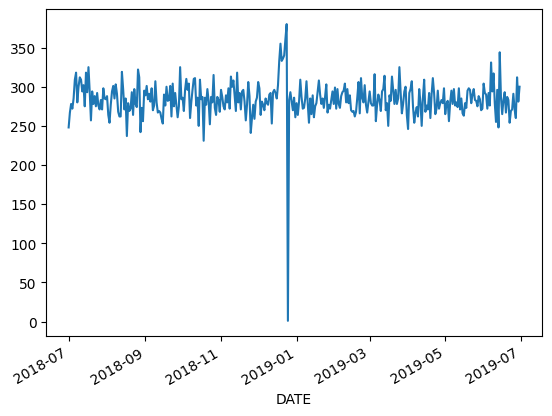

<Figure size 2000x600 with 0 Axes>

In [52]:
plot_transactions_day.plot(kind='line', x='DATE')
plt.figure(figsize=(20, 6))
plt.show()

In [53]:
december_transactions = transaction_data_chips[(transaction_data_chips['DATE'] >= "2018-12-01") & (transaction_data_chips['DATE'] <= "2018-12-31")]
december_transactions.sort_values('DATE', ascending=True)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips
197018,2018-12-01,168,168012,169390,75,Cobs Popd Sea Salt Chips 110g,2,7.6,False
19549,2018-12-01,79,79352,78222,30,Doritos Corn Chips Cheese Supreme 170g,2,8.8,False
245429,2018-12-01,89,89107,88232,83,WW D/Style Chip Sea Salt 200g,1,1.9,False
178507,2018-12-01,130,130041,133813,75,Cobs Popd Sea Salt Chips 110g,2,7.6,False
109754,2018-12-01,150,150107,149290,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,False
...,...,...,...,...,...,...,...,...,...
141481,2018-12-31,105,105110,105945,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,False
77782,2018-12-31,196,196030,195580,27,WW Supreme Cheese Corn Chips 200g,2,3.8,False
141679,2018-12-31,109,109131,110954,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,False
76600,2018-12-31,165,165218,166410,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,False


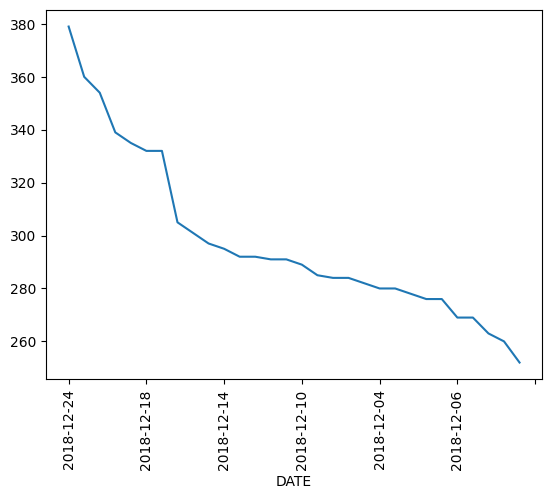

In [54]:
december_transactions['DATE'].value_counts().plot(kind='line')
plt.xticks(rotation=90)
plt.show()

In [55]:
transaction_data_chips[['BRAND', 'PACK_SIZE']] = transaction_data_chips['PROD_NAME'].str.extract(r'([^\d]+)(\d+g)')

In [56]:
transaction_data_chips.head(150)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips,BRAND,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,False,Natural Chip Compny SeaSalt,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,False,Smiths Crinkle Cut Chips Chicken,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,False,Smiths Chip Thinly S/Cream&Onion,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,False,Kettle Tortilla ChpsHny&Jlpno Chili,150g
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,False,Smiths Crinkle Chips Salt & Vinegar,330g
...,...,...,...,...,...,...,...,...,...,...,...
361,2018-08-04,7,7150,6899,90,Tostitos Smoked Chipotle 175g,2,8.8,False,Tostitos Smoked Chipotle,175g
364,2019-01-05,7,7150,6903,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,False,Infuzions Thai SweetChili PotatoMix,110g
369,2019-03-15,7,7173,7002,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,False,Smiths Crnkle Chip Orgnl Big Bag,380g
370,2019-04-16,7,7173,7003,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,False,Thins Potato Chips Hot & Spicy,175g


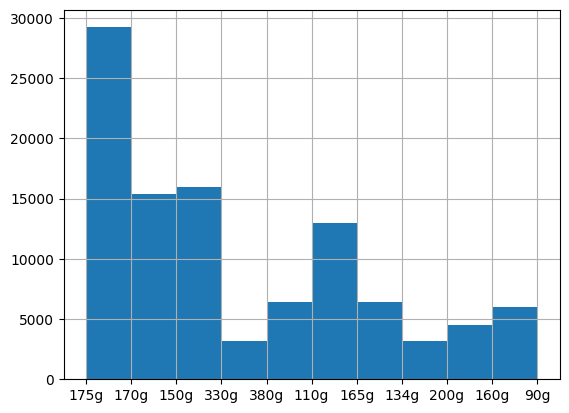

In [57]:
# plot histogram of pack sizes

transaction_data_chips['PACK_SIZE'].hist()

plt.show()

In [58]:
transaction_data_chips['PACK_SIZE'].value_counts()

PACK_SIZE
175g    29215
150g    15956
170g    15413
110g    12935
165g     6442
380g     6416
200g     4473
330g     3197
134g     3157
90g      3008
160g     2970
Name: count, dtype: int64

In [59]:
transaction_data_chips[transaction_data_chips['BRAND'] == 'RED']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips,BRAND,PACK_SIZE


In [60]:
#loading the purchase behavior dataset
purchase_behaviour = pd.read_csv(r'/home/jeromemugita/Downloads/QVI_purchase_behaviour.csv')
purchase_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [61]:
purchase_behaviour.shape

(72637, 3)

In [62]:
purchase_behaviour.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [63]:
purchase_behaviour.isna()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
72632,False,False,False
72633,False,False,False
72634,False,False,False
72635,False,False,False


In [64]:
purchase_behaviour.isna().any()

LYLTY_CARD_NBR      False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

In [65]:
purchase_behaviour.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [66]:
purchase_behaviour.isnull()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
72632,False,False,False
72633,False,False,False
72634,False,False,False
72635,False,False,False


In [67]:
purchase_behaviour.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [68]:
purchase_behaviour.head(20)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [69]:
purchase_behaviour.tail(20)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72617,2330191,OLDER SINGLES/COUPLES,Budget
72618,2330211,MIDAGE SINGLES/COUPLES,Budget
72619,2330251,RETIREES,Budget
72620,2330271,YOUNG FAMILIES,Mainstream
72621,2330291,OLDER SINGLES/COUPLES,Mainstream
72622,2330311,YOUNG SINGLES/COUPLES,Budget
72623,2330321,YOUNG SINGLES/COUPLES,Mainstream
72624,2330331,RETIREES,Budget
72625,2330431,OLDER SINGLES/COUPLES,Mainstream
72626,2330461,OLDER FAMILIES,Budget


In [70]:
purchase_behaviour.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [71]:
duplicated_purchases = purchase_behaviour.duplicated().sum()
duplicated_purchases

0

In [72]:
purchase_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [73]:
customer_insights = transaction_data.merge(purchase_behaviour, on='LYLTY_CARD_NBR', how='left')
customer_insights.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,False,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,True,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,False,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,False,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,False,MIDAGE SINGLES/COUPLES,Budget
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,True,MIDAGE SINGLES/COUPLES,Budget
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,False,MIDAGE SINGLES/COUPLES,Budget
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,True,MIDAGE SINGLES/COUPLES,Budget
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,False,MIDAGE SINGLES/COUPLES,Budget
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,True,MIDAGE SINGLES/COUPLES,Budget


In [74]:
customer_insights.drop(index=69762, inplace=True)
customer_insights

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,False,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,True,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,False,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,False,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,False,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,True,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,True,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,True,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,False,YOUNG SINGLES/COUPLES,Premium


In [75]:
customer_insights.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
non_chips           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [76]:
customer_insights.to_csv('customer_insights.csv', index=False)

#### 4. Data Analysis begins here:

In [78]:
popular_customers = customer_insights.sort_values('TOT_SALES', ascending = False)
popular_customers.head(15)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips,LIFESTAGE,PREMIUM_CUSTOMER
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,False,OLDER FAMILIES,Premium
150683,2019-05-20,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False,RETIREES,Mainstream
117850,2019-05-19,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False,OLDER SINGLES/COUPLES,Premium
184969,2019-05-20,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False,YOUNG FAMILIES,Budget
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False,OLDER FAMILIES,Premium
5179,2018-08-15,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False,MIDAGE SINGLES/COUPLES,Mainstream
171815,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False,RETIREES,Premium
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,False,OLDER FAMILIES,Mainstream
135346,2018-08-15,101,101110,100677,16,Smiths Crinkle Chips Salt & Vinegar 330g,5,28.5,False,RETIREES,Budget
99764,2018-08-18,237,237317,241546,20,Doritos Cheese Supreme 330g,5,28.5,True,OLDER SINGLES/COUPLES,Mainstream


In [79]:
#find the sales in chips per brand
chips_sales_distribution = customer_insights[customer_insights['non_chips'] == False].groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False)
chips_sales_distribution.head(20)

PROD_NAME
Dorito Corn Chp     Supreme 380g            39702.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Tortilla ChpsHny&Jlpno Chili 150g    29021.4
Kettle Tortilla ChpsBtroot&Ricotta 150g     27770.2
Kettle Tortilla ChpsFeta&Garlic 150g        27627.6
Doritos Corn Chips  Cheese Supreme 170g     27183.2
Doritos Corn Chips  Nacho Cheese 170g       26562.8
Tostitos Smoked     Chipotle 175g           26474.8
Doritos Corn Chips  Original 170g           26228.4
Tyrrells Crisps     Ched & Chives 165g      26149.2
Tyrrells Crisps     Lightly Salted 165g     25498.2
Doritos Corn Chip Mexican Jalapeno 150g     23887.5
Cobs Popd Sea Salt  Chips 110g              23852.6
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    23772.8
Doritos Corn Chip Southern Chicken 150g     23735.4
Infuzions Thai SweetChili PotatoMix 110g    23582.8
Cobs Popd Sour Crm  &Chives Chips 110g      22944.4
Pringles Original   Crisps 134g             22355.4
Th

In [80]:
# Here we can find that the most bought chips brand is the 'Dorito Corn Chp Supreme 380g'
most_bought_chips = customer_insights[customer_insights['non_chips'] == False].groupby('PROD_NAME')['TOT_SALES'].sum().idxmax()
most_bought_chips

'Dorito Corn Chp     Supreme 380g'

In [81]:
life_stage_df = customer_insights[customer_insights['non_chips'] == False].groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False).head(20)
life_stage_df

LIFESTAGE
OLDER SINGLES/COUPLES     155045.25
RETIREES                  140110.50
OLDER FAMILIES            135015.70
YOUNG FAMILIES            121552.70
YOUNG SINGLES/COUPLES     100826.10
MIDAGE SINGLES/COUPLES     71048.60
NEW FAMILIES               19372.65
Name: TOT_SALES, dtype: float64

In [82]:
#here we see that old singles or couples spend more on chips than other lifestage groups

In [83]:
# we may then choose to look further to find the most purchased chips brand per lifestage

chips_customers = customer_insights[customer_insights['non_chips'] == False]

most_bought_per_lifestage = chips_customers[['LIFESTAGE', 'PROD_NAME', 'TOT_SALES']].groupby('LIFESTAGE').sum()
most_bought_per_lifestage.sort_values('TOT_SALES', ascending=False).head(20)

# from the analysis, we can see which chips category is popular for each lifestage.

,PROD_NAME,TOT_SALES
LIFESTAGE,,
OLDER SINGLES/COUPLES,WW Original Corn Chips 200gDoritos Corn Chi...,155045.25
RETIREES,Sunbites Whlegrn Crisps Frch/Onin 90gSmiths...,140110.50
OLDER FAMILIES,Smiths Crinkle Chips Salt & Vinegar 330gKettle...,135015.70
YOUNG FAMILIES,Thins Chips Salt & Vinegar 175gDoritos Corn C...,121552.70
YOUNG SINGLES/COUPLES,Natural Chip Compny SeaSalt175gTostitos...,100826.10
MIDAGE SINGLES/COUPLES,Smiths Crinkle Cut Chips Chicken 170gSmiths C...,71048.60
NEW FAMILIES,Kettle Tortilla ChpsFeta&Garlic 150gSmiths Crn...,19372.65


In [84]:
# We can also find out how many customers are in each customer segment. 

chips_customers = customer_insights[customer_insights['non_chips'] == False]

most_bought_per_premium = chips_customers['PREMIUM_CUSTOMER'].value_counts()
most_bought_per_premium.sort_values(ascending=False).head(10)

# We find out that there 39840 mainstream, 36275 budget and 27067 premium chips customers

PREMIUM_CUSTOMER
Mainstream    39840
Budget        36275
Premium       27068
Name: count, dtype: int64

In [85]:
# To find out the number of chips bought per customer segment 
chips_customers = customer_insights[customer_insights['non_chips'] == False]

no_of_chips_per_customer_segment = chips_customers.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].sum().sort_values(ascending=False).head(20)
no_of_chips_per_customer_segment

# mainstream customers bought 75842 chips, Budget customers 69243 chips and Premium customers 51618 chips.

PREMIUM_CUSTOMER
Mainstream    75842
Budget        69243
Premium       51818
Name: PROD_QTY, dtype: int64

In [86]:
customer_insights['PACK_PRICE'] = customer_insights['TOT_SALES'] / customer_insights['PROD_QTY']
customer_insights

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips,LIFESTAGE,PREMIUM_CUSTOMER,PACK_PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,False,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,True,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,False,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,False,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,False,MIDAGE SINGLES/COUPLES,Budget,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,True,YOUNG SINGLES/COUPLES,Premium,5.40
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,True,YOUNG SINGLES/COUPLES,Premium,4.40
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,True,YOUNG SINGLES/COUPLES,Premium,4.40
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,False,YOUNG SINGLES/COUPLES,Premium,3.90


In [87]:
customer_chips = customer_insights[customer_insights['non_chips'] == False ]

average_chips_sales = pd.DataFrame(customer_chips.groupby('PREMIUM_CUSTOMER')['PACK_PRICE'].sum())
average_chips_sales.rename(columns={'PACK_PRICE':'TOTAL_CHIPS_SALES'}, inplace=True)
average_chips_sales

,TOTAL_CHIPS_SALES
PREMIUM_CUSTOMER,
Budget,135460.02
Mainstream,151986.55
Premium,101404.60


In [88]:
average_chips_sales['UNITS_SOLD'] = chips_customers.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].sum()
average_chips_sales

,TOTAL_CHIPS_SALES,UNITS_SOLD
PREMIUM_CUSTOMER,,
Budget,135460.02,69243
Mainstream,151986.55,75842
Premium,101404.60,51818


In [89]:
average_chips_sales['AVERAGE_PRICE'] = average_chips_sales['TOTAL_CHIPS_SALES'] / average_chips_sales['UNITS_SOLD']
average_chips_sales

,TOTAL_CHIPS_SALES,UNITS_SOLD,AVERAGE_PRICE
PREMIUM_CUSTOMER,,,
Budget,135460.02,69243,1.956299
Mainstream,151986.55,75842,2.003989
Premium,101404.60,51818,1.956938


In [90]:
# The average price for chips in the Budget customers category is $1.95 while the Mainstream customers average 
# price for chips is $2.00. The premium customers pay an average or $ 1.96 for each chips sachet. 

In [91]:
# The analysis and visualization above indicates the distribution of highest spending customers per customer group
# we may therefore conclude that, the highest spenders per premium group are older families, retirees and old singles
# furthermore, the same lifestages are also the highest spenders in the budget group. There is a slight variation in
# the mainstream group where we notice young singles have a significantly larger number of members. 

In [92]:
# To find an individual customers sales for all products
customer_salesDF = pd.DataFrame(customer_insights.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().sort_values(ascending=False))
customer_salesDF

,TOT_SALES
LYLTY_CARD_NBR,
226000,650.0
230078,138.6
63197,132.8
259009,127.2
162039,126.8
...,...
51251,1.5
41089,1.5
2272,1.5


In [93]:
# To find the chips sales for an individual customer
chips_salesDF = pd.DataFrame(customer_insights[customer_insights['non_chips'] == False].groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().sort_values(ascending=False))
chips_salesDF

,TOT_SALES
LYLTY_CARD_NBR,
226000,650.0
58361,83.2
88105,82.8
69154,79.6
28020,78.4
...,...
50502,1.7
255396,1.7
2324,1.7


In [94]:
# customer sales merged with chips sales
chips_customer_sales = chips_salesDF.merge(customer_salesDF, on='LYLTY_CARD_NBR', how='left', suffixes=('_CHIPS', '_OTHER_ITEMS'))
chips_customer_sales.sort_values(['TOT_SALES_CHIPS', 'TOT_SALES_OTHER_ITEMS'], ascending=False)

,TOT_SALES_CHIPS,TOT_SALES_OTHER_ITEMS
LYLTY_CARD_NBR,,
226000,650.0,650.0
58361,83.2,124.8
88105,82.8,108.8
69154,79.6,109.6
28020,78.4,115.6
...,...,...
2281,1.7,1.7
50502,1.7,1.7
255396,1.7,1.7


In [95]:
# To find how much customers spend on chips against their total expenditure 

chips_customer_sales['PPN_SPENT_ON_CHIPS'] = chips_customer_sales['TOT_SALES_CHIPS'] / chips_customer_sales['TOT_SALES_OTHER_ITEMS']
chips_customer_sales.sort_values('PPN_SPENT_ON_CHIPS', ascending=True)

,TOT_SALES_CHIPS,TOT_SALES_OTHER_ITEMS,PPN_SPENT_ON_CHIPS
LYLTY_CARD_NBR,,,
180050,1.7,47.7,0.035639
93217,1.7,44.5,0.038202
28073,1.7,39.1,0.043478
241093,3.8,86.8,0.043779
259055,3.4,75.4,0.045093
...,...,...,...
214087,7.8,7.8,1.000000
37328,7.8,7.8,1.000000
17005,7.8,7.8,1.000000


In [96]:
non_chips_customers = customer_insights[customer_insights['non_chips'] == True]
non_chips_customers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips,LIFESTAGE,PREMIUM_CUSTOMER,PACK_PRICE
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,True,MIDAGE SINGLES/COUPLES,Budget,2.1
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,True,MIDAGE SINGLES/COUPLES,Budget,5.1
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,True,MIDAGE SINGLES/COUPLES,Budget,3.6
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,True,MIDAGE SINGLES/COUPLES,Budget,3.6
11,2018-08-20,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0,True,MIDAGE SINGLES/COUPLES,Budget,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-16,272,272236,269976,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6,True,YOUNG SINGLES/COUPLES,Premium,3.8
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,True,YOUNG SINGLES/COUPLES,Premium,5.4
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,True,YOUNG SINGLES/COUPLES,Premium,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,True,YOUNG SINGLES/COUPLES,Premium,4.4


In [97]:
all_customersDF = pd.DataFrame(customer_insights['PREMIUM_CUSTOMER'].value_counts())
all_customersDF

,count
PREMIUM_CUSTOMER,
Mainstream,101988
Budget,93157
Premium,69690


In [98]:
chips_customersDF = pd.DataFrame(chips_customers['PREMIUM_CUSTOMER'].value_counts())
chips_customersDF

,count
PREMIUM_CUSTOMER,
Mainstream,39840
Budget,36275
Premium,27068


In [99]:
chips_vs_allcustomers = chips_customersDF.merge(all_customersDF, on = 'PREMIUM_CUSTOMER', suffixes=('_CHIPS_CUSTOMERS', '_ALL_CUSTOMERS'))
chips_vs_allcustomers

,count_CHIPS_CUSTOMERS,count_ALL_CUSTOMERS
PREMIUM_CUSTOMER,,
Mainstream,39840,101988
Budget,36275,93157
Premium,27068,69690


In [100]:
chips_vs_allcustomers['PROPORTION_OF_CHIPS_CSTMR}'] = chips_vs_allcustomers['count_CHIPS_CUSTOMERS'] / chips_vs_allcustomers['count_ALL_CUSTOMERS'] * 100
chips_vs_allcustomers

,count_CHIPS_CUSTOMERS,count_ALL_CUSTOMERS,PROPORTION_OF_CHIPS_CSTMR}
PREMIUM_CUSTOMER,,,
Mainstream,39840,101988,39.063419
Budget,36275,93157,38.939640
Premium,27068,69690,38.840580


In [101]:
# From the mainstream customers, 39.06% purchased chips, 38.94% of the Budget customers purchased chips
# and 38.83% of the Premium customers purchased chips. 

In [102]:
# This is the total sales per premium group and lifestage

total_sales_life_prem = chips_customers[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOT_SALES']].groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum()
total_sales_life_prem

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES    13937.80
                  NEW FAMILIES               8406.85
                  OLDER FAMILIES            63684.05
                  OLDER SINGLES/COUPLES     52735.10
                  RETIREES                  43578.20
                  YOUNG FAMILIES            53062.05
                  YOUNG SINGLES/COUPLES     23723.90
Mainstream        MIDAGE SINGLES/COUPLES    34886.85
                  NEW FAMILIES               6571.00
                  OLDER FAMILIES            40259.15
                  OLDER SINGLES/COUPLES     51638.40
                  RETIREES                  59178.55
                  YOUNG FAMILIES            36273.05
                  YOUNG SINGLES/COUPLES     60805.40
Premium           MIDAGE SINGLES/COUPLES    22223.95
                  NEW FAMILIES               4394.80
                  OLDER FAMILIES            31072.50
                  OLDER SINGLES/COUPLES     50671.75
     

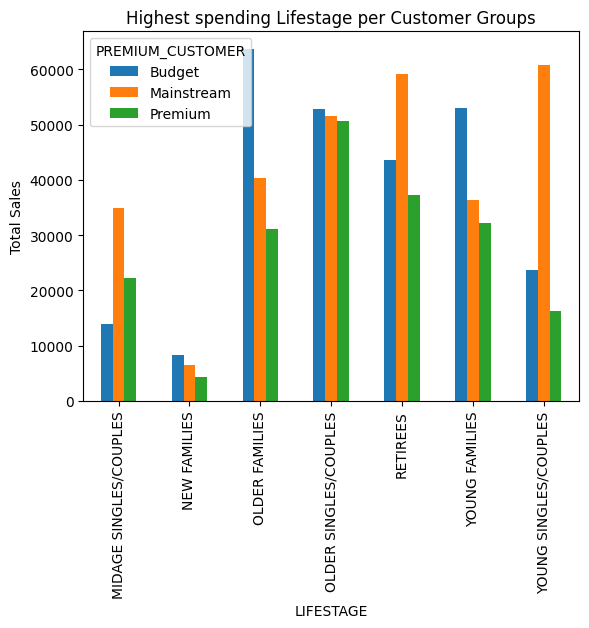

In [103]:
pivot_data = total_sales_life_prem.unstack(level=0)

ax = pivot_data.plot(kind='bar')

ax.set_xlabel('LIFESTAGE')
ax.set_ylabel('Total Sales')
ax.set_title('Highest spending Lifestage per Customer Groups')
ax.legend(title='PREMIUM_CUSTOMER')

plt.xticks(rotation=90)

plt.show()

In [104]:
# To find the total number of customers per premium group and lifestage
total_customers_life_prem = chips_customers[['LIFESTAGE', 'PREMIUM_CUSTOMER']].groupby('PREMIUM_CUSTOMER').value_counts()
total_customers_life_prem

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            8865
                  YOUNG FAMILIES            7386
                  OLDER SINGLES/COUPLES     7236
                  RETIREES                  5988
                  YOUNG SINGLES/COUPLES     3627
                  MIDAGE SINGLES/COUPLES    1990
                  NEW FAMILIES              1183
Mainstream        RETIREES                  8294
                  YOUNG SINGLES/COUPLES     8181
                  OLDER SINGLES/COUPLES     7168
                  OLDER FAMILIES            5569
                  YOUNG FAMILIES            5071
                  MIDAGE SINGLES/COUPLES    4650
                  NEW FAMILIES               907
Premium           OLDER SINGLES/COUPLES     6931
                  RETIREES                  5119
                  YOUNG FAMILIES            4486
                  OLDER FAMILIES            4269
                  MIDAGE SINGLES/COUPLES    3172
                  YOUNG SING

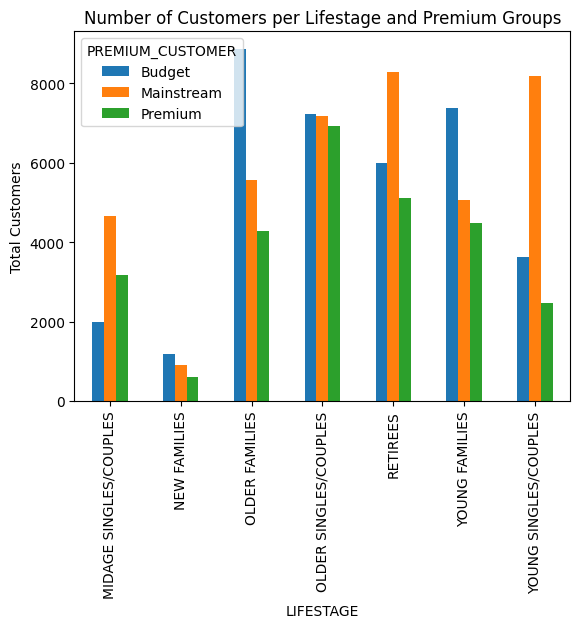

In [105]:
pivot_data = total_customers_life_prem.unstack(level=0)

ax = pivot_data.plot(kind='bar')

ax.set_xlabel('LIFESTAGE')
ax.set_ylabel('Total Customers')
ax.set_title('Number of Customers per Lifestage and Premium Groups')
ax.legend(title='PREMIUM_CUSTOMER')

plt.xticks(rotation=90)

plt.show()

In [106]:
## to find the average Units purchased per customer by lifestage and premium customer
average_units_per_customer_prem_lifestage = chips_customers[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'PROD_QTY', 'LYLTY_CARD_NBR']].groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE', 'LYLTY_CARD_NBR'])['PROD_QTY'].mean()
average_units_per_customer_prem_lifestage

PREMIUM_CUSTOMER  LIFESTAGE               LYLTY_CARD_NBR
Budget            MIDAGE SINGLES/COUPLES  1052              1.0
                                          1081              1.5
                                          1184              1.0
                                          1307              2.0
                                          1343              2.0
                                                           ... 
Premium           YOUNG SINGLES/COUPLES   272193            1.0
                                          272194            2.0
                                          272197            2.0
                                          272319            2.0
                                          272379            2.0
Name: PROD_QTY, Length: 51950, dtype: float64

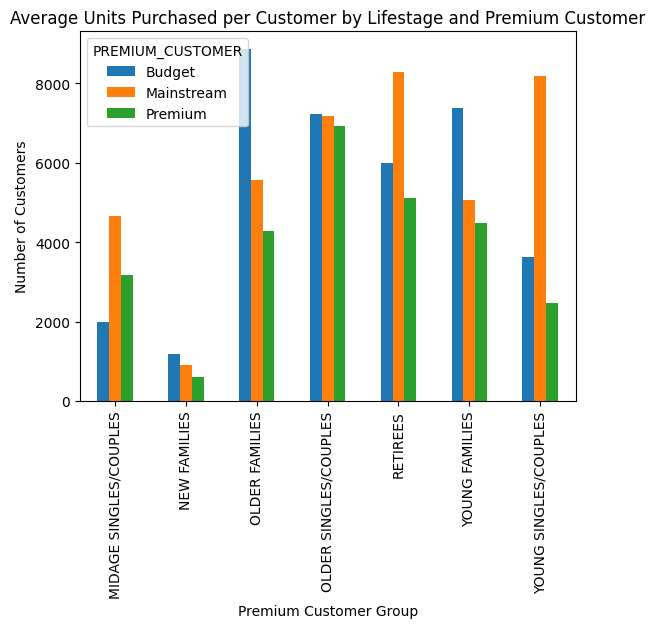

In [107]:
pivot_data = total_customers_life_prem.unstack(level=0)

ax = pivot_data.plot(kind='bar')

ax.set_xlabel('Premium Customer Group')
ax.set_ylabel('Number of Customers')
ax.set_title('Average Units Purchased per Customer by Lifestage and Premium Customer')
ax.legend(title='PREMIUM_CUSTOMER')

plt.xticks(rotation=90)

plt.show()


In [108]:
# Here we want to find the average price per unit chips bought for each customer
# segment as this is also a driver of total sales

average_price_per_unit_premium_lifestage = customer_chips[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'PACK_PRICE']].groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['PACK_PRICE'].mean()

average_price_per_unit_premium_lifestage


PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES    3.675704
                  NEW FAMILIES              3.826754
                  OLDER FAMILIES            3.689887
                  OLDER SINGLES/COUPLES     3.806226
                  RETIREES                  3.834294
                  YOUNG FAMILIES            3.704572
                  YOUNG SINGLES/COUPLES     3.596333
Mainstream        MIDAGE SINGLES/COUPLES    3.917118
                  NEW FAMILIES              3.871499
                  OLDER FAMILIES            3.701562
                  OLDER SINGLES/COUPLES     3.761119
                  RETIREES                  3.778569
                  YOUNG FAMILIES            3.681828
                  YOUNG SINGLES/COUPLES     3.994231
Premium           MIDAGE SINGLES/COUPLES    3.704540
                  NEW FAMILIES              3.811401
                  OLDER FAMILIES            3.654041
                  OLDER SINGLES/COUPLES     3.810807
     

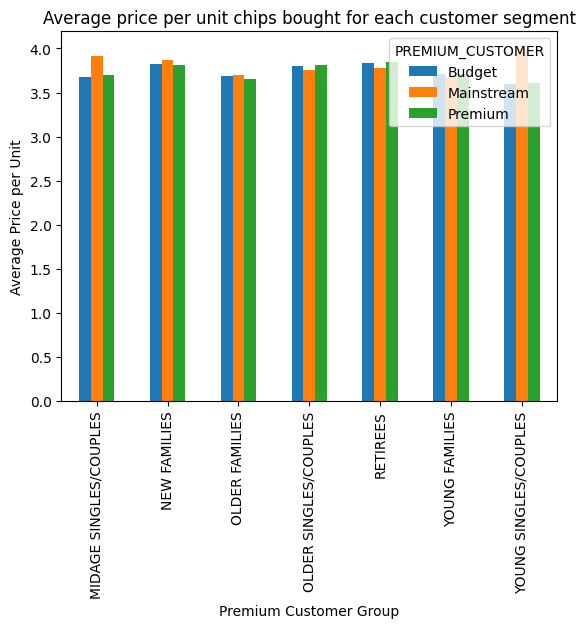

In [109]:
pivot_data = average_price_per_unit_premium_lifestage.unstack(level=0)

ax = pivot_data.plot(kind='bar')

ax.set_xlabel('Premium Customer Group')
ax.set_ylabel('Average Price per Unit')
ax.set_title('Average price per unit chips bought for each customer segment')
ax.legend(title='PREMIUM_CUSTOMER')

plt.xticks(rotation=90)

plt.show()


In [110]:
# T- Test Between mainstream and premium midage and young singles and couple

In [111]:
# Data for the 'Mainstream' and 'Premium Midage' groups
working_group = customer_chips[['PREMIUM_CUSTOMER', 'LIFESTAGE', 'PACK_PRICE']]
premium_midage_group = working_group[(working_group['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (working_group['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') & (working_group['PREMIUM_CUSTOMER'] == 'Premium')]
mainstream_midage_group = working_group[(working_group['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (working_group['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') & (working_group['PREMIUM_CUSTOMER'] == 'Mainstream')]


premium_data = premium_midage_group.groupby('LIFESTAGE')['PACK_PRICE'].mean()

mainstream_data = mainstream_midage_group.groupby('LIFESTAGE')['PACK_PRICE'].mean()


# # Performing the t-test between 'Mainstream' and 'Premium Midage'
t_statistic1, p_value1 = stats.ttest_ind(mainstream_data, premium_data, equal_var=False)

print("T-Statistic: ", t_statistic1)
print("P-Value: ", p_value1)


T-Statistic:  1.4004100025446393
P-Value:  0.3050232785577799


In [112]:
# # T- Test Between mainstream and budget midage and young singles and couple

In [113]:
# Data for the 'Mainstream' and 'Premium Midage' groups
working_group = customer_chips[['PREMIUM_CUSTOMER', 'LIFESTAGE', 'PACK_PRICE']]
budget_midage_group = working_group[(working_group['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (working_group['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') & (working_group['PREMIUM_CUSTOMER'] == 'Budget')]
mainstream_midage_group = working_group[(working_group['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (working_group['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') & (working_group['PREMIUM_CUSTOMER'] == 'Mainstream')]


budget_data = budget_midage_group.groupby('LIFESTAGE')['PACK_PRICE'].mean()

mainstream_data = mainstream_midage_group.groupby('LIFESTAGE')['PACK_PRICE'].mean()


# # Performing the t-test between 'Mainstream' and 'Premium Midage'
t_statistic1, p_value1 = stats.ttest_ind(mainstream_data, budget_data, equal_var=False)

print("T-Statistic: ", t_statistic1)
print("P-Value: ", p_value1)

T-Statistic:  1.3741006908211104
P-Value:  0.32636378100490787


#### The T-statistic in both tests is a positive value indicating that the mean of the budget and premium average 
#### spending is greater than the mainstream customer's average spending. 

#### Our hypothesis in this case is: Is there a significant difference between the average spending between 
#### the mainstream and premium midage and young singles and couple

#### Our significance value is 0.05 degree of significance. 
#### Since out p-value is significantly higher than the degree of significance we may choose to fail to reject
#### our null hypothesis. This indicates that the difference in average spending between the two group is not large.

In [115]:
customer_insights[['BRAND', 'PACK_SIZE']] = customer_insights['PROD_NAME'].str.extract(r'([^\d]+)(\d+g)')
customer_insights

chips_customer = customer_insights[customer_insights['non_chips'] == False]
chips_customer

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,non_chips,LIFESTAGE,PREMIUM_CUSTOMER,PACK_PRICE,BRAND,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,False,YOUNG SINGLES/COUPLES,Premium,3.00,Natural Chip Compny SeaSalt,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,False,MIDAGE SINGLES/COUPLES,Budget,1.45,Smiths Crinkle Cut Chips Chicken,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,False,MIDAGE SINGLES/COUPLES,Budget,3.00,Smiths Chip Thinly S/Cream&Onion,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,False,MIDAGE SINGLES/COUPLES,Budget,4.60,Kettle Tortilla ChpsHny&Jlpno Chili,150g
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,False,MIDAGE SINGLES/COUPLES,Budget,5.70,Smiths Crinkle Chips Salt & Vinegar,330g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,False,YOUNG SINGLES/COUPLES,Premium,4.60,Kettle Tortilla ChpsBtroot&Ricotta,150g
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,False,YOUNG SINGLES/COUPLES,Premium,3.80,Cobs Popd Sea Salt Chips,110g
264827,2018-08-28,272,272197,269911,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,False,YOUNG SINGLES/COUPLES,Premium,3.80,Infuzions Thai SweetChili PotatoMix,110g
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,False,YOUNG SINGLES/COUPLES,Premium,3.30,Thins Chips Light& Tangy,175g


In [116]:
young_single_couple_mainstream = chips_customer[(customer_chips['PREMIUM_CUSTOMER'] == 'Mainstream') & (chips_customer['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]
young_single_couple_mainstream[['PROD_NAME', 'PROD_QTY']].groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False)

PROD_NAME
Doritos Corn Chips  Cheese Supreme 170g     621
Kettle Tortilla ChpsHny&Jlpno Chili 150g    604
Smiths Crnkle Chip  Orgnl Big Bag 380g      596
Smiths Crinkle Chips Salt & Vinegar 330g    582
Tyrrells Crisps     Ched & Chives 165g      580
Infuzions Thai SweetChili PotatoMix 110g    576
Doritos Corn Chips  Original 170g           573
Dorito Corn Chp     Supreme 380g            569
Tyrrells Crisps     Lightly Salted 165g     563
Cobs Popd Sour Crm  &Chives Chips 110g      556
Doritos Corn Chips  Nacho Cheese 170g       549
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    547
Kettle Tortilla ChpsFeta&Garlic 150g        547
Thins Potato Chips  Hot & Spicy 175g        546
Doritos Corn Chip Mexican Jalapeno 150g     542
Pringles Original   Crisps 134g             538
Kettle Tortilla ChpsBtroot&Ricotta 150g     524
Tostitos Smoked     Chipotle 175g           518
Cobs Popd Sea Salt  Chips 110g              514
Thins Chips Seasonedchicken 175g            505
Doritos Corn Chip Southern Chi

#### INSIGHTS: young singles from the mainstream customer segment prefer Dorito corn chips more than other brands

In [118]:
customers_buy_chips = customer_insights[customer_insights['non_chips'] == False]
prefered_chips_size = customers_buy_chips[['PROD_NAME', 'PACK_SIZE']].groupby('PACK_SIZE').value_counts()
prefered_chips_size.sort_values(ascending=False)

PACK_SIZE  PROD_NAME                               
150g       Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
110g       Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
165g       Tyrrells Crisps     Ched & Chives 165g      3268
110g       Cobs Popd Sea Salt  Chips 110g              3265
           Infuzions Thai SweetChili PotatoMix 110g    3242
380g       Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
175g       Thins Potato Chips  Hot & Spicy 175g        3229
170g       Doritos Corn Chips  Cheese Supreme 170g     3217
150g       Doritos Corn Chip Mexican Jalapeno 150g     3204
330g       Smiths Crinkle Chips Salt & Vinegar 330g    3197
175g       Thins Chips Light&  Tangy 175g              3188
380g       Dorito Corn Chp     Supreme 380g            3184
165g       Tyrrells Crisps     Lightly Salted 165g     3174
150g       Doritos Corn Chip Southern Chicken 150g     3172
170g       Doritos Corn Chips  Nacho Cheese 170g       3160
110g       Cobs Popd Sour Crm  &Chives Chips 110

In [119]:
young_single_couple_mainstream_size_preference = young_single_couple_mainstream[['PROD_NAME', 'PACK_SIZE']].groupby('PACK_SIZE').value_counts()
young_single_couple_mainstream_size_preference.sort_values(ascending=False)

PACK_SIZE  PROD_NAME                               
170g       Doritos Corn Chips  Cheese Supreme 170g     326
380g       Smiths Crnkle Chip  Orgnl Big Bag 380g      323
150g       Kettle Tortilla ChpsHny&Jlpno Chili 150g    323
165g       Tyrrells Crisps     Ched & Chives 165g      318
330g       Smiths Crinkle Chips Salt & Vinegar 330g    314
110g       Infuzions Thai SweetChili PotatoMix 110g    306
170g       Doritos Corn Chips  Original 170g           304
380g       Dorito Corn Chp     Supreme 380g            303
165g       Tyrrells Crisps     Lightly Salted 165g     301
110g       Cobs Popd Sour Crm  &Chives Chips 110g      299
170g       Doritos Corn Chips  Nacho Cheese 170g       296
110g       Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    293
150g       Doritos Corn Chip Mexican Jalapeno 150g     290
           Kettle Tortilla ChpsFeta&Garlic 150g        288
175g       Thins Potato Chips  Hot & Spicy 175g        287
134g       Pringles Original   Crisps 134g             287
150g

#### INSIGHTS: Young singles tend to buy larger packs of chips compared to the rest of the population

#### RECOMMENDATIONS:

#### From the above analysis, we can conclude a few things:
####  . The highest spending group comprises of retirees old families, couples and old singles while the lower 
####    percentage of store visitors are younger citizens. 
####  . The largest customer premium group is the mainstream customer group, followed by the budget group then 
####    the premium customers. 
####  . The driver of purchases here seems to be difference in age groups between the lifestage customer 
####    classifications. The younger families especially the new, young families and mid age family groups appear
####    to be the least spenders probably because their budgets revolve mostly around family expenses (food etc.) as opposed 
####    to snacks. Older families and retirees may have less family expenses resulting to surplus that could be spent
####    otherwise on snacks or casual purchases. 

#### . Therefore, my recommendation to the category manager is; since the highest spenders and older citizens, the 
#### marketting department could come up with schemes to attract a bigger population of these spenders to 
#### increase volume of sales. 

#### . The category manager could use the most popular chips data, 'Dorito Corn Chips' and suggest offers for this
#### brand. Maybe add raffle draws or an additional snack for every purchase or even price deductions to boost
#### volume sales.

#### . The category manager could recommend discounts on young family customers that would encourage more spending 
#### for chips. Additionally, the stores could come up with kid packs for different brands with toys or limited 
#### edition action figures to promote sales and attract customers from this premium groups. 